**Electric Vehicle Data**
- Electric Vehicle Manufacturers
- Electric Vehicle Model
- Number of seats
- Vehicle Battery capacity (in KWH)
- Range of Vehicle in km
- Acceleration (0-100) in Seconds
- Top Speed in Km/hr
- Fast charge speed in km/hr
- The efficiency of Vehicle in Wh/km
- Drive Configuration
- Price in Germany (Euro)
- Price in Netherland (Euro)
- Price in the UK (Pound)


# Data Extraction

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("../Data/EV_BASE.csv")
df

,Acceleration,Battery,Brand,Drive,Efficiency,Fastcharge,Market_Segment,Model,Price_GE,Price_Nl,Price_UK,Range,Seat,Topspeed,Tow_Capacity
0,3.5 sec,74.0,Kia,All Wheel Drive,200 Wh/km,970 km/h,C,EV6 GT,"€69,990","€69,295","£61,595",370 km,5,260 km/h,1800.0
1,5.0 sec,75.0,Tesla,All Wheel Drive,172 Wh/km,670 km/h,D,Model Y Long Range Dual Motor,"€59,965","€66,995","£57,990",435 km,5,217 km/h,1600.0
2,6.1 sec,57.5,Tesla,Rear Wheel Drive,151 Wh/km,630 km/h,D,Model 3,"€52,965","€52,995","£48,490",380 km,5,225 km/h,1000.0
3,6.9 sec,57.5,Tesla,Rear Wheel Drive,167 Wh/km,580 km/h,D,Model Y,"€56,965","€50,995","£51,990",345 km,5,217 km/h,1600.0
4,7.9 sec,61.7,MG,Rear Wheel Drive,169 Wh/km,450 km/h,C,MG4 Electric 64 kWh,"€35,990","€34,285","£28,495",365 km,5,160 km/h,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.3 sec,68.0,Opel,Front Wheel Drive,257 Wh/km,290 km/h,N,Zafira-e Life M 75 kWh,"€69,250","€65,078",NaN,265 km,9,130 km/h,1000.0
278,12.1 sec,45.0,Opel,Front Wheel Drive,257 Wh/km,280 km/h,N,Zafira-e Life L 50 kWh,"€64,075","€57,637","£49,465",175 km,9,130 km/h,1000.0
279,12.1 sec,45.0,Opel,Front Wheel Drive,250 Wh/km,290 km/h,N,Zafira-e Life M 50 kWh,"€63,250","€56,124","£49,105",180 km,9,130 km/h,1000.0
280,13.1 sec,45.0,Peugeot,Front Wheel Drive,257 Wh/km,280 km/h,N,e-Traveller Long 50 kWh,"€54,430","€59,364","£54,275",175 km,9,130 km/h,1000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Acceleration    282 non-null    object 
 1   Battery         282 non-null    float64
 2   Brand           282 non-null    object 
 3   Drive           282 non-null    object 
 4   Efficiency      282 non-null    object 
 5   Fastcharge      282 non-null    object 
 6   Market_Segment  282 non-null    object 
 7   Model           282 non-null    object 
 8   Price_GE        258 non-null    object 
 9   Price_Nl        253 non-null    object 
 10  Price_UK        189 non-null    object 
 11  Range           282 non-null    object 
 12  Seat            282 non-null    int64  
 13  Topspeed        282 non-null    object 
 14  Tow_Capacity    185 non-null    float64
dtypes: float64(2), int64(1), object(12)
memory usage: 33.2+ KB


In [ ]:
df.isnull().sum()

Acceleration       0
Battery            0
Brand              0
Drive              0
Efficiency         0
Fastcharge         0
Market_Segment     0
Model              0
Price_GE          24
Price_Nl          29
Price_UK          93
Range              0
Seat               0
Topspeed           0
Tow_Capacity      97
dtype: int64

# Data Cleaning

In [ ]:
df1 = df.drop(['Tow_Capacity','Price_Nl', 'Price_UK'], axis=1)
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

Acceleration      0
Battery           0
Brand             0
Drive             0
Efficiency        0
Fastcharge        0
Market_Segment    0
Model             0
Price_GE          0
Range             0
Seat              0
Topspeed          0
dtype: int64

In [ ]:
df2= df1.copy()

df2['Battery'] = df2['Battery'].astype(float)
df2['Range'] = df2['Range'].str.extract('(\d+)').astype('int64')
df2['Topspeed'] = df2['Topspeed'].str.extract('(\d+)').astype('int64')
df2['Efficiency'] = df2['Efficiency'].str.extract('(\d+)').astype('int64')      
df2['Acceleration'] = df2['Acceleration'].str.extract('(\d+.\d+)').astype(float)
df2['Fastcharge'] = df2['Fastcharge'].str.extract('(\d+)').replace('-','0').fillna(0).astype('int64')
df2['Price_GE'] = df2['Price_GE'].str.replace(',','').str.extract('(\d+)').astype('int64')

In [ ]:
df2.head(5)

,Acceleration,Battery,Brand,Drive,Efficiency,Fastcharge,Market_Segment,Model,Price_GE,Range,Seat,Topspeed
0,3.5,74.0,Kia,All Wheel Drive,200,970,C,EV6 GT,69990,370,5,260
1,5.0,75.0,Tesla,All Wheel Drive,172,670,D,Model Y Long Range Dual Motor,59965,435,5,217
2,6.1,57.5,Tesla,Rear Wheel Drive,151,630,D,Model 3,52965,380,5,225
3,6.9,57.5,Tesla,Rear Wheel Drive,167,580,D,Model Y,56965,345,5,217
4,7.9,61.7,MG,Rear Wheel Drive,169,450,C,MG4 Electric 64 kWh,35990,365,5,160


# Visualize

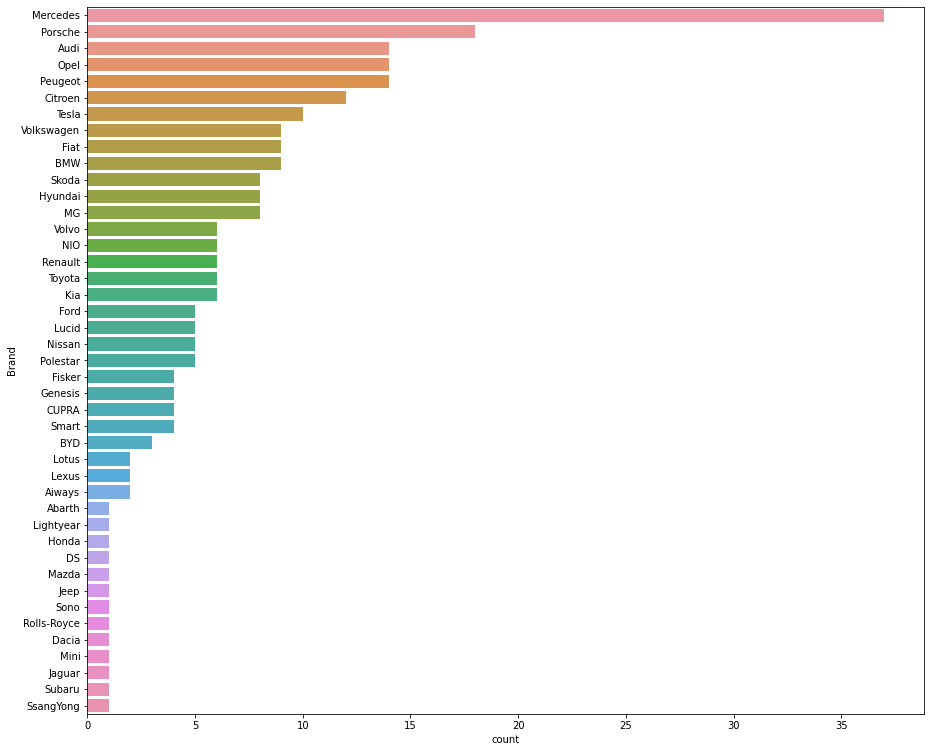

In [ ]:
plt.figure(figsize=(15,13))
sns.countplot(y = 'Brand', data = df2,order = df2['Brand'].value_counts().index)
plt.show()


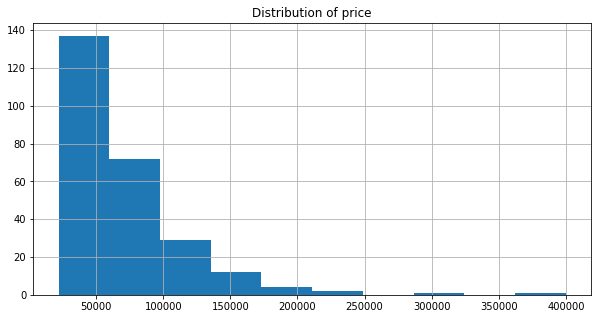

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of price")
df2['Price_GE'].hist(bins=10)
plt.show()

<Figure size 432x288 with 0 Axes>

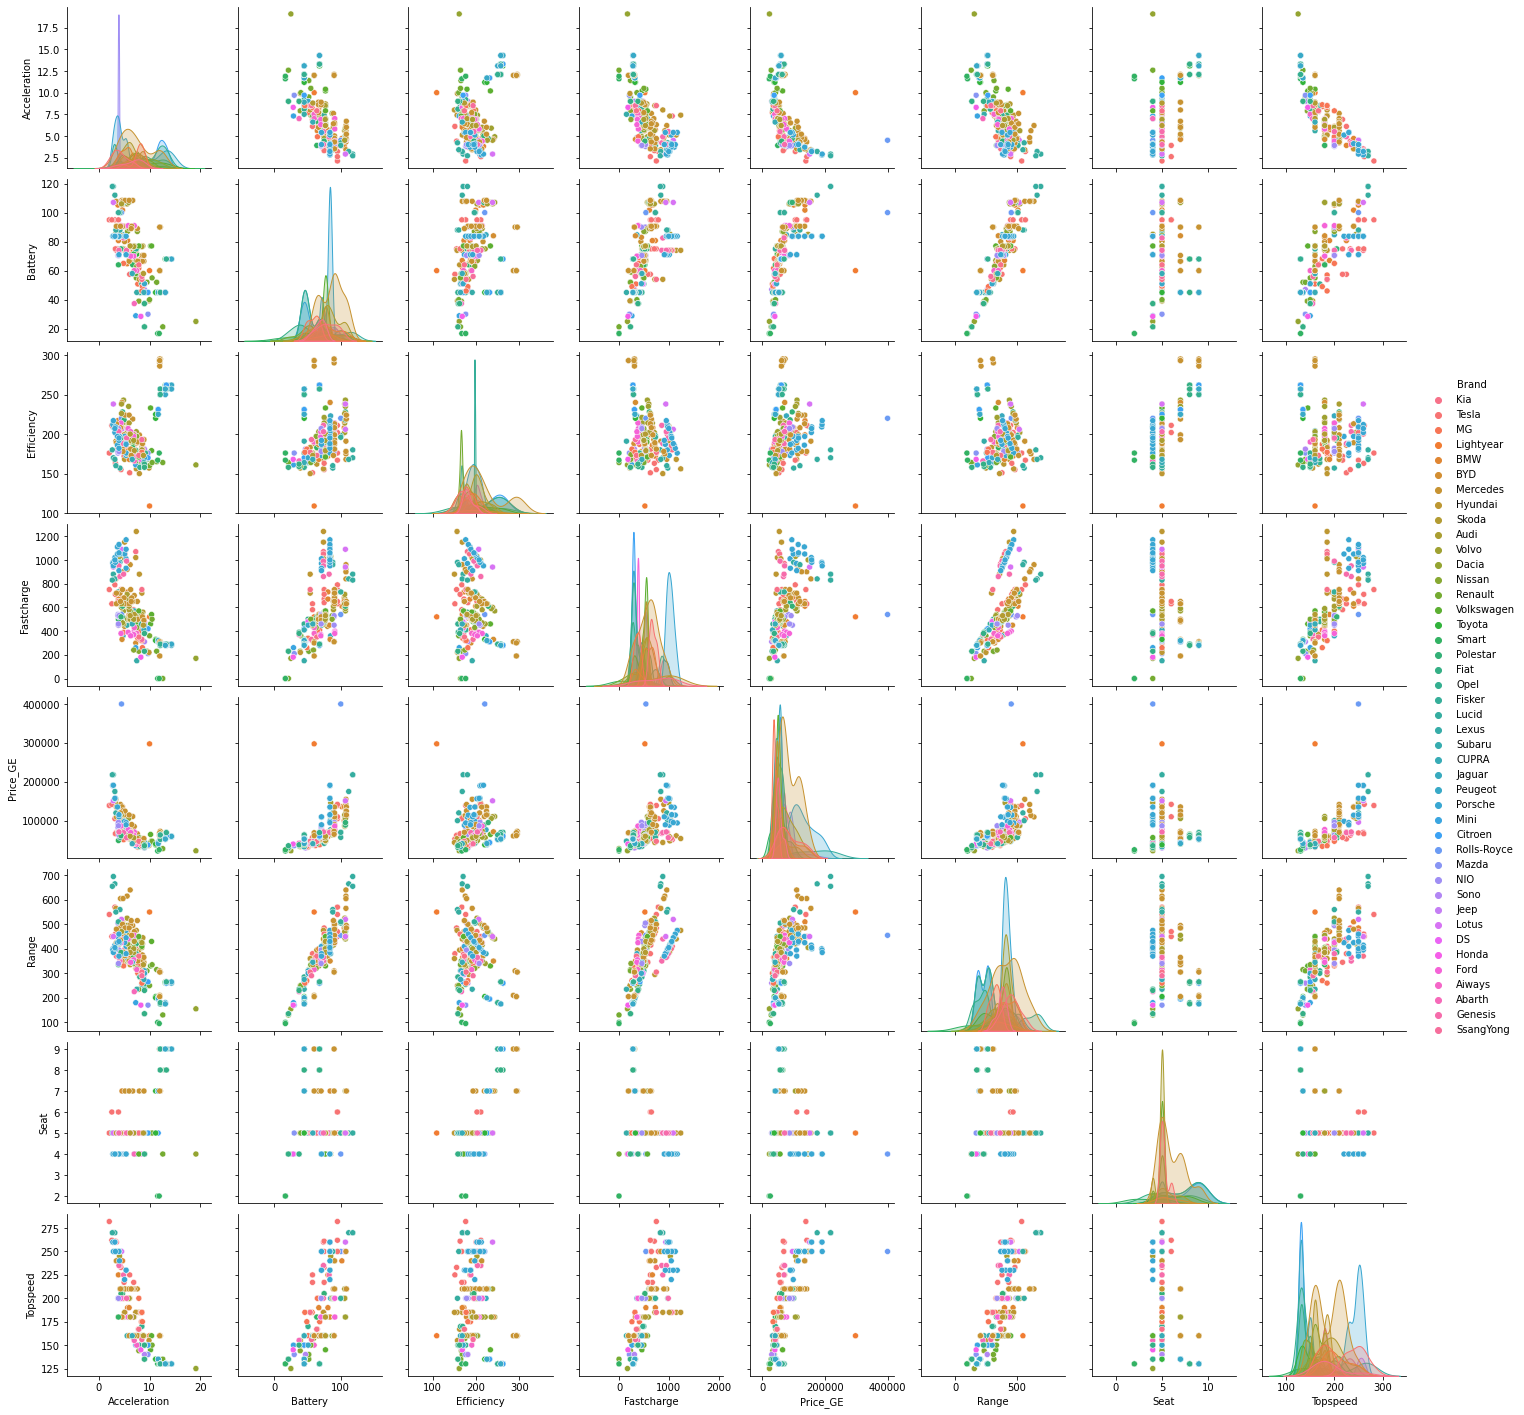

In [ ]:
plt.figure(figsize=(6,4))
sns.pairplot(df2, kind='scatter', hue='Brand');

#Feature Extraction and Encoder


In [ ]:
# create object of LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['Drive'] = encoder.fit_transform(df2['Drive'])
df2['Market_Segment'] = encoder.fit_transform(df2['Market_Segment'])
df2

,Acceleration,Battery,Brand,Drive,Efficiency,Fastcharge,Market_Segment,Model,Price_GE,Range,Seat,Topspeed
0,3.5,74.0,Kia,0,200,970,2,EV6 GT,69990,370,5,260
1,5.0,75.0,Tesla,0,172,670,3,Model Y Long Range Dual Motor,59965,435,5,217
2,6.1,57.5,Tesla,2,151,630,3,Model 3,52965,380,5,225
3,6.9,57.5,Tesla,2,167,580,3,Model Y,56965,345,5,217
4,7.9,61.7,MG,2,169,450,2,MG4 Electric 64 kWh,35990,365,5,160
...,...,...,...,...,...,...,...,...,...,...,...,...
277,13.3,68.0,Opel,1,257,290,6,Zafira-e Life M 75 kWh,69250,265,9,130
278,12.1,45.0,Opel,1,257,280,6,Zafira-e Life L 50 kWh,64075,175,9,130
279,12.1,45.0,Opel,1,250,290,6,Zafira-e Life M 50 kWh,63250,180,9,130
280,13.1,45.0,Peugeot,1,257,280,6,e-Traveller Long 50 kWh,54430,175,9,130


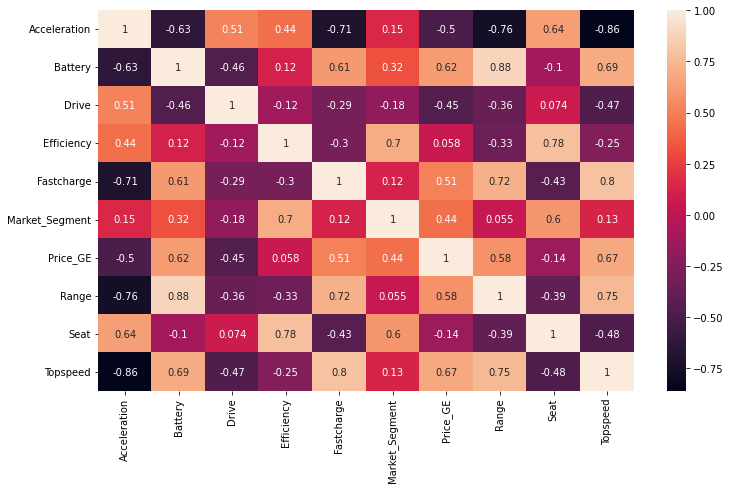

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df2.corr(), annot=True)
plt.show()

# Training and Testing

In [ ]:
X= df2.drop(['Brand','Model','Market_Segment','Price_GE'], axis=1).values
y=df2['Price_GE'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
print('X_train dimension= ', x_train.shape)
print('X_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (172, 8)
X_test dimension=  (86, 8)
y_train dimension=  (172,)
y_test dimension=  (86,)


# Modeling

In [ ]:
model = RandomForestRegressor(n_estimators = 300, random_state = 0,n_jobs=-1)
# fit the regressor with x and y data
model.fit(x_train, y_train)

y_pred= model.predict(x_test)


In [ ]:
model_list = [LinearRegression(),
              DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_jobs=-1, random_state = 0)] 
                
val = []
model_name = []
r2 = []
mae = []
rmse = []
for model in model_list:
    mf = model.fit(x_train, y_train)
    Pred = mf.predict(x_test)
    scores=cross_val_score(model, x_train, y_train, cv=5)
    print(model.__class__.__name__, " : R2 Score: ", "{:.2f}".format(r2_score(y_test, Pred)*100), " : Validation Accuracy : ", "{:.2f}".format(np.mean(scores)*100))
    model_name.append(model.__class__.__name__)
    r2.append("{:.2f}".format(r2_score(y_test, Pred)*100))
    mae.append("{:.2f}".format(mean_absolute_error(y_test,Pred)))
    rmse.append("{:.2f}".format(np.sqrt(mean_squared_error(y_test,Pred))))
    val.append("{:.2f}".format(np.mean(scores)*100))

LinearRegression  : R2 Score:  49.35  : Validation Accuracy :  54.17
DecisionTreeRegressor  : R2 Score:  52.47  : Validation Accuracy :  67.17
RandomForestRegressor  : R2 Score:  59.05  : Validation Accuracy :  75.03


In [ ]:
Table_compare = pd.DataFrame({'Linear Regression': [r2[0], val[0], mae[0],rmse[0]],
                   'DecisionTree Regression': [r2[1], val[1], mae[1],rmse[1]],
                   'Random Forest Regression' : [r2[2],val[2],mae[2],rmse[2]]},
                  index=['R2','Cross_Score','MAE', 'RMSE'])
Table_compare.T

,R2,Cross_Score,MAE,RMSE
Linear Regression,49.35,54.17,16839.08,35808.98
DecisionTree Regression,52.47,67.17,13411.10,34687.49
Random Forest Regression,59.05,75.03,10926.98,32196.90


# Evaluation

In [ ]:
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2: ",r2_score(y_test,y_pred))

MAE:  10798.27023277347
RMSE:  32377.435725340387
R2:  0.5859276705471209


# Predict EV Price

In [ ]:
#@title Save and Load Model
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)
print("=== Save Sucessful ===")
# load saved model
with open('model_pkl' , 'rb') as f:
    model_load = pickle.load(f)

=== Save Sucessful ===


In [ ]:
#@title Input Form Electric Vehicle specifications
Battery = 60 #@param {type:"slider", min:20, max:150, step:1}
Range = 320 #@param {type:"slider", min:95, max:1000, step:5}
Topspeed = 160 #@param {type:"slider", min:120, max:300, step:5}
Fastcharge = 300 #@param {type:"slider", min:100, max:1200, step:10}
Acceleration = 7 #@param {type:"slider", min:1, max:20, step:1}
Efficiency = 188 #@param {type:"slider", min:100, max:300, step:1}
Seat = "5" #@param ["2", "4", "5", "7", "9"]
Drive = "Rear Wheel Drive" #@param ["All Wheel Drive", "Front Wheel Drive","Rear Wheel Drive"]
if Drive == "All Wheel Drive":
  D = 0
elif Drive == "Front Wheel Drive":
  D = 1
elif Drive == "Rear Wheel Drive":
  D = 2
price = model_load.predict([[Acceleration,Battery,D,Efficiency,Fastcharge,Range,int(Seat),Topspeed]])

print("Predict EV car is : %.f Euro" %price[0])

Predict EV car is : 44141 Euro
